In [1]:
from IPython.display import Image

## Tokenization

Tokenization is at the heart of much weirdness of LLMs. Do not brush it off.

- Why can't LLM spell words? Tokenization.
    - How many letters 'l' are there in the word '.DefaultCellStyle'?
        - even 'Gemini 2.5 pro' gave me a wrong answer.
- Why can't LLM do super simple string processing tasks like reversing a string? Tokenization.
- Why is LLM worse at non-English languages (e.g. Japanese)? Tokenization.
    - the language model sees less non-english data during training of the model parameters.
    - also the tokenizer is not sufficiently trained on non-english data.
        - for example, 'hello' is a single token.
        - '안녕하세요' has more token than 'hello'
        - basically everything is a lot more bloated and diffuse.
- Why is LLM bad at simple arithmetic? Tokenization.
- Why did GPT-2 have more than necessary trouble coding in Python? Tokenization.
- Why did my LLM abruptly halt when it sees the string "<|endoftext|>"? Tokenization.
- What is this weird warning I get about a "trailing whitespace"? Tokenization.
- Why the LLM break if I ask it about "SolidGoldMagikarp"? Tokenization.
- Why should I prefer to use YAML over JSON with LLMs? Tokenization.
    - YAML has less token then JSON. It means 'YAML is more cheaper than JSON'.
- Why is LLM not actually end-to-end language modeling? Tokenization.
- What is the real root of suffering? Tokenization.

Good tokenization web app: https://tiktokenizer.vercel.app

Example string:

Tokenization is at the heart of much weirdness of LLMs. Do not brush it off.

127 + 677 = 804
1275 + 6773 = 8041

Egg.
I have an Egg.
egg.
EGG.

만나서 반가워요. 저는 OpenAI에서 개발한 대규모 언어 모델인 ChatGPT입니다. 궁금한 것이 있으시면 무엇이든 물어보세요.

for i in range(1, 101):
    if i % 3 == 0 and i % 5 == 0:
        print("FizzBuzz")
    elif i % 3 == 0:
        print("Fizz")
    elif i % 5 == 0:
        print("Buzz")
    else:
        print(i)



In [2]:
"안녕하세요 👋 (hello in Korean!)"

'안녕하세요 👋 (hello in Korean!)'

In [3]:
[ord(x) for x in "안녕하세요 👋 (hello in Korean!)"]

[50504,
 45397,
 54616,
 49464,
 50836,
 32,
 128075,
 32,
 40,
 104,
 101,
 108,
 108,
 111,
 32,
 105,
 110,
 32,
 75,
 111,
 114,
 101,
 97,
 110,
 33,
 41]

### why cant't we just use this natively as is?

1. Unicode is quite long.
2. Unicode keeps change.
3. UTF-8 is better.

In [4]:
list("안녕하세요 👋 (hello in Korean!)".encode('utf-8'))

[236,
 149,
 136,
 235,
 133,
 149,
 237,
 149,
 152,
 236,
 132,
 184,
 236,
 154,
 148,
 32,
 240,
 159,
 145,
 139,
 32,
 40,
 104,
 101,
 108,
 108,
 111,
 32,
 105,
 110,
 32,
 75,
 111,
 114,
 101,
 97,
 110,
 33,
 41]

but if we just use utf8 naively, these are bite-streams so that would imply a vocabulary length of only 256 possible tokens.

In [5]:
# text from https://www.reedbeta.com/blog/programmers-intro-to-unicode/
text = "Ｕｎｉｃｏｄｅ! 🅤🅝🅘🅒🅞🅓🅔‽ 🇺‌🇳‌🇮‌🇨‌🇴‌🇩‌🇪! 😄 The very name strikes fear and awe into the hearts of programmers worldwide. We all know we ought to “support Unicode” in our software (whatever that means—like using wchar_t for all the strings, right?). But Unicode can be abstruse, and diving into the thousand-page Unicode Standard plus its dozens of supplementary annexes, reports, and notes can be more than a little intimidating. I don’t blame programmers for still finding the whole thing mysterious, even 30 years after Unicode’s inception."
tokens = text.encode("utf-8") # raw bytes
tokens = list(map(int, tokens)) # convert to a list of integers in range 0..255 for convenience
print('---')
print(text)
print("length:", len(text))
print('---')
print(tokens)
print("length:", len(tokens))

---
Ｕｎｉｃｏｄｅ! 🅤🅝🅘🅒🅞🅓🅔‽ 🇺‌🇳‌🇮‌🇨‌🇴‌🇩‌🇪! 😄 The very name strikes fear and awe into the hearts of programmers worldwide. We all know we ought to “support Unicode” in our software (whatever that means—like using wchar_t for all the strings, right?). But Unicode can be abstruse, and diving into the thousand-page Unicode Standard plus its dozens of supplementary annexes, reports, and notes can be more than a little intimidating. I don’t blame programmers for still finding the whole thing mysterious, even 30 years after Unicode’s inception.
length: 533
---
[239, 188, 181, 239, 189, 142, 239, 189, 137, 239, 189, 131, 239, 189, 143, 239, 189, 132, 239, 189, 133, 33, 32, 240, 159, 133, 164, 240, 159, 133, 157, 240, 159, 133, 152, 240, 159, 133, 146, 240, 159, 133, 158, 240, 159, 133, 147, 240, 159, 133, 148, 226, 128, 189, 32, 240, 159, 135, 186, 226, 128, 140, 240, 159, 135, 179, 226, 128, 140, 240, 159, 135, 174, 226, 128, 140, 240, 159, 135, 168, 226, 128, 140, 240, 159, 135, 180, 226, 128, 140

In [6]:
def get_stats(ids):
    """
    연속된 토큰의 출현 횟수을 count하는 함수
    """
    counts = {}
    for pair in zip(ids, ids[1:]): # Pythonic way to iterate consecutive elements
        counts[pair] = counts.get(pair, 0) + 1
    return counts

stats = get_stats(tokens)
# print(stats)
print(sorted(((v,k) for k,v in stats.items()),reverse=True))

[(20, (101, 32)), (15, (240, 159)), (12, (226, 128)), (12, (105, 110)), (10, (115, 32)), (10, (97, 110)), (10, (32, 97)), (9, (32, 116)), (8, (116, 104)), (7, (159, 135)), (7, (159, 133)), (7, (97, 114)), (6, (239, 189)), (6, (140, 240)), (6, (128, 140)), (6, (116, 32)), (6, (114, 32)), (6, (111, 114)), (6, (110, 103)), (6, (110, 100)), (6, (109, 101)), (6, (104, 101)), (6, (101, 114)), (6, (32, 105)), (5, (117, 115)), (5, (115, 116)), (5, (110, 32)), (5, (100, 101)), (5, (44, 32)), (5, (32, 115)), (4, (116, 105)), (4, (116, 101)), (4, (115, 44)), (4, (114, 105)), (4, (111, 117)), (4, (111, 100)), (4, (110, 116)), (4, (110, 105)), (4, (105, 99)), (4, (104, 97)), (4, (103, 32)), (4, (101, 97)), (4, (100, 32)), (4, (99, 111)), (4, (97, 109)), (4, (85, 110)), (4, (32, 119)), (4, (32, 111)), (4, (32, 102)), (4, (32, 85)), (3, (118, 101)), (3, (116, 115)), (3, (116, 114)), (3, (116, 111)), (3, (114, 116)), (3, (114, 115)), (3, (114, 101)), (3, (111, 102)), (3, (111, 32)), (3, (108, 108)), (

In [7]:
top_pair = max(stats, key=stats.get)
top_pair

(101, 32)

In [8]:
def merge(ids: list[int], pair: tuple[int, int] , idx: int):
    """
    BPE의 핵심 기능

    정수 리스트(ids)에서 연속적으로 나타나는 특정 숫자쌍(pair)을 찾아서 새로운 하나의 숫자(idx)로 교체한다.

    Args:
        ids  : 토큰(숫자)들의 리스트. ex) [5,6,6,7,9,1]
        pair : 병합할 토큰(숫자)의 쌍 ex) (6,7)
        idx  : pair를 대체할 새로운 토큰(숫자) ex) 99

    Returns:
        list[int] : 병합 작업이 완료된 새로운 토큰 ID 리스트
    """
    newids = []
    i = 0
    while i < len(ids):
        # if we are not at the very last position AND the pair matches, replace it
        if i < len(ids) - 1 and ids[i] == pair[0] and ids[i+1] == pair[1]:
            newids.append(idx)
            i += 2
        else:
            newids.append(ids[i])
            i += 1
    return newids

# print(merge([5, 6, 6, 7, 9, 1], (6,7), 99))

tokens2 = merge(tokens, top_pair, 256)
print(tokens2)
print('length:', len(tokens2))

[239, 188, 181, 239, 189, 142, 239, 189, 137, 239, 189, 131, 239, 189, 143, 239, 189, 132, 239, 189, 133, 33, 32, 240, 159, 133, 164, 240, 159, 133, 157, 240, 159, 133, 152, 240, 159, 133, 146, 240, 159, 133, 158, 240, 159, 133, 147, 240, 159, 133, 148, 226, 128, 189, 32, 240, 159, 135, 186, 226, 128, 140, 240, 159, 135, 179, 226, 128, 140, 240, 159, 135, 174, 226, 128, 140, 240, 159, 135, 168, 226, 128, 140, 240, 159, 135, 180, 226, 128, 140, 240, 159, 135, 169, 226, 128, 140, 240, 159, 135, 170, 33, 32, 240, 159, 152, 132, 32, 84, 104, 256, 118, 101, 114, 121, 32, 110, 97, 109, 256, 115, 116, 114, 105, 107, 101, 115, 32, 102, 101, 97, 114, 32, 97, 110, 100, 32, 97, 119, 256, 105, 110, 116, 111, 32, 116, 104, 256, 104, 101, 97, 114, 116, 115, 32, 111, 102, 32, 112, 114, 111, 103, 114, 97, 109, 109, 101, 114, 115, 32, 119, 111, 114, 108, 100, 119, 105, 100, 101, 46, 32, 87, 256, 97, 108, 108, 32, 107, 110, 111, 119, 32, 119, 256, 111, 117, 103, 104, 116, 32, 116, 111, 32, 226, 128, 156

In [9]:
# making the training text longer to have more representative token statistics
# text from https://www.reedbeta.com/blog/programmers-intro-to-unicode/
with open('text.txt', 'r', encoding='utf-8') as f:
    text = f.read()
tokens = text.encode("utf-8") # raw bytes
tokens = list(map(int, tokens)) # convert to a list of integers in range 0..255 for convenience

In [10]:
def get_stats(ids):
    counts = {}
    for pair in zip(ids, ids[1:]):
        counts[pair] = counts.get(pair, 0) + 1
    return counts

def merge(ids, pair, idx):
    newids = []
    i = 0
    while i < len(ids):
        if i < len(ids) - 1 and ids[i] == pair[0] and ids[i+1] == pair[1]:
            newids.append(idx)
            i += 2
        else:
            newids.append(ids[i])
            i += 1

    return newids

# ---
vocab_size = 276 # the desired final vocabulary size
num_merges = vocab_size - 256
ids = list(tokens) # copy so we don't destroy the original list
# list(tokens) : list 생성자는 tokens 리스트를 순회하면서, 각 요소를 가져와 완전히 새로운 리스트를 만든다. 즉, 서로 다른 메모리 공간을 차지하는 별개의 객체가 된다.
# 또 다른 shallow copy 방법 : ids = tokens[:]

merges = {} # (int, int) -> int
for i in range(num_merges):
    stats = get_stats(ids)
    pair = max(stats, key=stats.get)
    idx = 256 + i
    print(f'merging {pair} into a new token {idx}')
    ids = merge(ids, pair, idx)
    merges[pair] = idx

merging (101, 32) into a new token 256
merging (105, 110) into a new token 257
merging (115, 32) into a new token 258
merging (116, 104) into a new token 259
merging (101, 114) into a new token 260
merging (99, 111) into a new token 261
merging (116, 32) into a new token 262
merging (226, 128) into a new token 263
merging (44, 32) into a new token 264
merging (97, 110) into a new token 265
merging (111, 114) into a new token 266
merging (100, 32) into a new token 267
merging (97, 114) into a new token 268
merging (101, 110) into a new token 269
merging (257, 103) into a new token 270
merging (261, 100) into a new token 271
merging (121, 32) into a new token 272
merging (46, 32) into a new token 273
merging (97, 108) into a new token 274
merging (259, 256) into a new token 275


In [11]:
print('tokens length:', len(tokens))
print('ids length: ', len(ids))
print(f'compression ratio: {len(tokens) / len(ids):.2f}X')

tokens length: 24636
ids length:  19484
compression ratio: 1.26X


#### Note
the Tokenizer is a completely separate, independent module from the LLM. It has its own training dataset of text (which could be different from that of the LLM), on which you train the vocabulary using the Byte Pair Encoding (BPE) algorithm. It then translates back and forth between raw text and sequences of tokens. The LLM later only ever sees the tokens and never directly deals with any text.

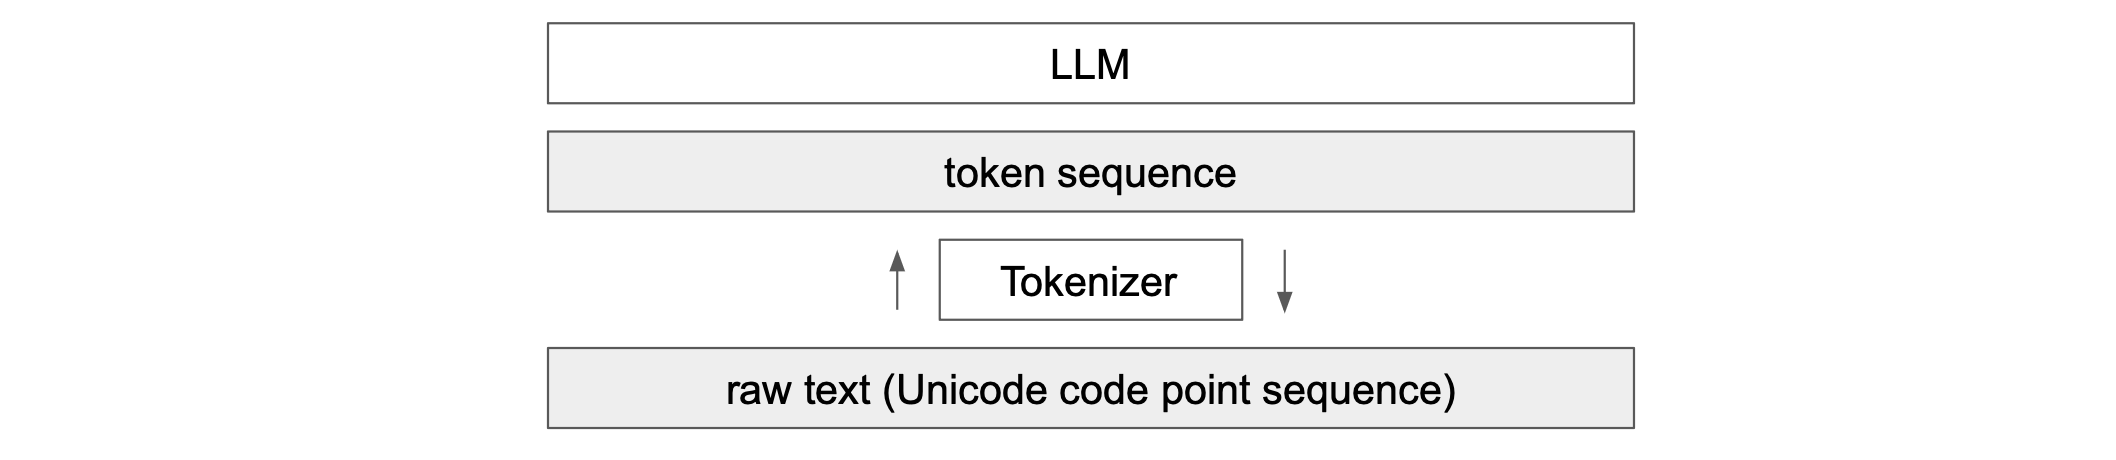

In [12]:
Image("tokenizer.png")

### decoding

In [13]:
# vocab : {0: b'\x00', 1: b'\x01', ..., 65: b'A', ..., 255: b'\xff'}
vocab = {idx: bytes([idx]) for idx in range(256)}

# vocab dict를 확장한다.
# 확장 내용은, merges에 기록해둔, 256부터의 병합 규칙을 추가하는 것이다.
# ex : (101, 32) , 256라는 규칙을,
#       vocab[256] = vocab[101] + vocab[32]
#       와 같이, vocab의 key와 value에 새롭게 추가
for (p0, p1), idx in merges.items():
    vocab[idx] = vocab[p0] + vocab[p1]

def decode(ids):
    # given ids (list of integers), return Python string
    tokens = b"".join(vocab[idx] for idx in ids)
    text = tokens.decode('utf-8', errors='replace') # errors가 나타났을 때 'replace'는 대체 문자 처리
    return text

print(decode([128]))

�


### encoding

In [14]:
def encode(text):
  # given a string, return list of integers (the tokens)
  tokens = list(text.encode("utf-8"))
  while len(tokens) >= 2:
    stats = get_stats(tokens)
    # pair : merges[p]를 기준으로 stats의 최솟값을 구하고  pair에 저장한다.
    # 여기서 인자로 전달되는 p는 (44,32)와 같은 key값이다.
    pair = min(stats, key=lambda p: merges.get(p, float("inf")))
    if pair not in merges:
      break # nothing else can be merged
    idx = merges[pair]
    tokens = merge(tokens, pair, idx)
  return tokens

print(encode("hello world!"))

[104, 101, 108, 108, 111, 32, 119, 266, 108, 100, 33]


In [15]:
print(decode(encode("hello world")))

hello world


In [16]:
text2 = decode(encode(text))
print(text2 == text)

True


In [17]:
valtext = "Many common characters, including numerals, punctuation, and other symbols, are unified within the standard and are not treated as specific to any given writing system. Unicode encodes thousands of emoji, with the continued development thereof conducted by the Consortium as a part of the standard.[4] Moreover, the widespread adoption of Unicode was in large part responsible for the initial popularization of emoji outside of Japan. Unicode is ultimately capable of encoding more than 1.1 million characters."
valtext2 = decode(encode(valtext))
print(valtext2 == valtext)

True


 ### Forced splits using regex patterns (GPT series)

In [18]:
import regex as re
gpt2pat = re.compile(
                        r"""
                        's|
                        't|
                        're|
                        've|
                        'm|
                        'll|
                        'd|
                        ?\p{L}+|
                        ?\p{N}+|
                        ?[^\s\p{L}\p{N}]+|
                        \s+(?!\S)|
                        \s+
                        """
)

# ?     : 바로 앞의 문자(여기서는 공백'')가 0번 또는 1번 나타날 수 있음을 표시
# \p{L} : Letter, Unicode Property
# +     : 바로 앞 패턴이 1번 이상 반복됨을 표시
#  ?\p{L}+ : (optional) 공백 1개로 시작하는 하나 이상의 연속된 모든 언어 문자를 찾는다.

# \p{N} : Number, Unicode Property
# ?\p{N}+ : (optional) 공백 1개로 시작하는 하나 이상의 연속된 숫자를 찾는다.

# [...] : 문자 집합을 표시
# ^     : NOT, 문자 집합 안에서, '아닌'라는 의미 표시
# \s    : 모든 공백 문자(스페이스, 탭, 줄바꿈 등)을 표시
# ?[^\s\p{L}\p{N}]+ : (optional) 공백 1개로 시작하고, [공백, 문자, 숫자]가 아닌 문자들이 1개 이상 연속된 것을 찾는다. 즉, 구두점이 특수기호 덩어리를 의미한다.

# (?!\S) : 부정형 전방탐색, \S는 공백이 아닌 문자를 의미하므로, (?!\S)는 바로 뒤에 공백이 아닌 문자가 오면 안 된다는 조건이다.

print(re.findall(gpt2pat, "Hello've world123 how's are you!!!?"))

'''
gpt2 regex의 문제점
'(아포스트로피)를 일관되게 사용하지 않았다.
'''

[]


"\ngpt2 regex의 문제점\n'(아포스트로피)를 일관되게 사용하지 않았다.\n"

In [19]:
import tiktoken

# GPT-2 (does not merge spaces)
enc = tiktoken.get_encoding('gpt2')
print(enc.encode("    hello world!!!"))

# GPT-4 (merges spaces)
enc = tiktoken.get_encoding('cl100k_base')
print(enc.encode("    hello world!!!"))

[220, 220, 220, 23748, 995, 10185]
[262, 24748, 1917, 12340]


Reference the GPT-2 encoder.py. Download the vocab.bpe and encoder.json files.

In [20]:
import os, json

with open('encoder.json', 'r') as f:
    encoder = json.load(f) # <--- ~equivalent to our "vocab"

with open('vocab.bpe', 'r', encoding="utf-8") as f:
    bpe_data = f.read()
bpe_merges = [tuple(merge_str.split()) for merge_str in bpe_data.split('\n')[1:-1]]
# ^---- ~equivalent to our "merges"

 ### special tokens

In [21]:
# language model에게 document의 끝을 알려준다.
encoder['<|endoftext|>'] # the only special token in use for the GPT-2 base model

50256

### minbpe exercise

exercise progression
https://github.com/karpathy/minbpe/blob/master/exercise.md

In [22]:
import tiktoken
enc = tiktoken.get_encoding("cl100k_base") # GPT-4 tokenizer
print(enc.encode("안녕하세요 👋 (hello in Korean!)"))
print(enc.decode(enc.encode("안녕하세요 👋 (hello in Korean!)")) == "안녕하세요 👋 (hello in Korean!)")
# match the above for your own tokenizer, and also implement a train() function

[31495, 230, 75265, 243, 92245, 62904, 233, 320, 15339, 304, 16526, 16715]
True


### sentencepiece

Commonly used because (unlike tiktoken) it can efficiently both train and inference BPE tokenizers. It is used in both Llama and Mistral series.

[sentencepiece on Github link](https://github.com/google/sentencepiece).

**The big difference**: sentencepiece runs BPE on the Unicode code points directly! It then has an option `character_coverage` for what to do with very very rare codepoints that appear very few times, and it either maps them onto an UNK token, or if `byte_fallback` is turned on, it encodes them with utf-8 and then encodes the raw bytes instead.

TLDR:

- tiktoken encodes to utf-8 and then BPEs bytes
- sentencepiece BPEs the code points and optionally falls back to utf-8 bytes for rare code points (rarity is determined by character_coverage hyperparameter), which then get translated to byte tokens.

(Personally I think the tiktoken way is a lot cleaner...)

In [23]:
import sentencepiece as spm

In [24]:
# write a toy.txt file with some random text
with open("toy.txt", "w", encoding="utf-8") as f:
  f.write("SentencePiece is an unsupervised text tokenizer and detokenizer mainly for Neural Network-based text generation systems where the vocabulary size is predetermined prior to the neural model training. SentencePiece implements subword units (e.g., byte-pair-encoding (BPE) [Sennrich et al.]) and unigram language model [Kudo.]) with the extension of direct training from raw sentences. SentencePiece allows us to make a purely end-to-end system that does not depend on language-specific pre/postprocessing.")

In [25]:
# train a sentencepiece model on it
# the settings here are (best effort) those used for training Llama 2
import os

options = dict(
  # input spec
  input="toy.txt",
  input_format="text",
  # output spec
  model_prefix="tok400", # output filename prefix
  # algorithm spec
  # BPE alg
  model_type="bpe",
  vocab_size=400,
  # normalization
  normalization_rule_name="identity", # ew, turn off normalization
  remove_extra_whitespaces=False,
  input_sentence_size=200000000, # max number of training sentences
  max_sentence_length=4192, # max number of bytes per sentence
  seed_sentencepiece_size=1000000,
  shuffle_input_sentence=True,
  # rare word treatment
  character_coverage=0.99995,
  byte_fallback=True,
  # merge rules
  split_digits=True,
  split_by_unicode_script=True,
  split_by_whitespace=True,
  split_by_number=True,
  max_sentencepiece_length=16,
  add_dummy_prefix=True,
  allow_whitespace_only_pieces=True,
  # special tokens
  unk_id=0, # the UNK token MUST exist
  bos_id=1, # the others are optional, set to -1 to turn off
  eos_id=2,
  pad_id=-1,
  # systems
  num_threads=os.cpu_count(), # use ~all system resources
)

spm.SentencePieceTrainer.train(**options)


In [26]:
sp = spm.SentencePieceProcessor()
sp.load('tok400.model')
vocab = [[sp.id_to_piece(idx), idx] for idx in range(sp.get_piece_size())]
vocab

[['<unk>', 0],
 ['<s>', 1],
 ['</s>', 2],
 ['<0x00>', 3],
 ['<0x01>', 4],
 ['<0x02>', 5],
 ['<0x03>', 6],
 ['<0x04>', 7],
 ['<0x05>', 8],
 ['<0x06>', 9],
 ['<0x07>', 10],
 ['<0x08>', 11],
 ['<0x09>', 12],
 ['<0x0A>', 13],
 ['<0x0B>', 14],
 ['<0x0C>', 15],
 ['<0x0D>', 16],
 ['<0x0E>', 17],
 ['<0x0F>', 18],
 ['<0x10>', 19],
 ['<0x11>', 20],
 ['<0x12>', 21],
 ['<0x13>', 22],
 ['<0x14>', 23],
 ['<0x15>', 24],
 ['<0x16>', 25],
 ['<0x17>', 26],
 ['<0x18>', 27],
 ['<0x19>', 28],
 ['<0x1A>', 29],
 ['<0x1B>', 30],
 ['<0x1C>', 31],
 ['<0x1D>', 32],
 ['<0x1E>', 33],
 ['<0x1F>', 34],
 ['<0x20>', 35],
 ['<0x21>', 36],
 ['<0x22>', 37],
 ['<0x23>', 38],
 ['<0x24>', 39],
 ['<0x25>', 40],
 ['<0x26>', 41],
 ['<0x27>', 42],
 ['<0x28>', 43],
 ['<0x29>', 44],
 ['<0x2A>', 45],
 ['<0x2B>', 46],
 ['<0x2C>', 47],
 ['<0x2D>', 48],
 ['<0x2E>', 49],
 ['<0x2F>', 50],
 ['<0x30>', 51],
 ['<0x31>', 52],
 ['<0x32>', 53],
 ['<0x33>', 54],
 ['<0x34>', 55],
 ['<0x35>', 56],
 ['<0x36>', 57],
 ['<0x37>', 58],
 ['<0x38>', 5

In [27]:
ids = sp.encode("hello 안녕하세요")
print(ids)

[362, 378, 361, 372, 358, 362, 239, 152, 139, 238, 136, 152, 240, 152, 155, 239, 135, 187, 239, 157, 151]


In [28]:
print([sp.id_to_piece(idx) for idx in ids])
'''
왜 hello 앞에 __ 토큰이 있는가?
>>> add_dummy_prefix
'''

['▁', 'h', 'e', 'l', 'lo', '▁', '<0xEC>', '<0x95>', '<0x88>', '<0xEB>', '<0x85>', '<0x95>', '<0xED>', '<0x95>', '<0x98>', '<0xEC>', '<0x84>', '<0xB8>', '<0xEC>', '<0x9A>', '<0x94>']


### SentencePiece: Byte Fallback (어떻게 한국어 토큰이 인코드되었는가)

#### SentencePiece의 byte_fallback 작동 원리
핵심: 단어장에 없는(Out-of-Vocabulary, OOV) 단어를 바이트(byte) 단위로 분해하여 처리하는 기능

#### **처리 과정** (예: "안녕하세요")

1. 모델이 단어장에 없는 단어 (예: '안녕하세요')를 만납니다.
2. byte_fallback 기능이 해당 단어를 각 글자의 UTF-8 바이트로 변환합니다.
    '안' → 0xEC 0x95 0x88
    '녕' → 0xEB 0x85 0x95

3. 변환된 개별 바이트(0xEC, 0x95 등)를 미리 정의된 바이트 토큰 (<0xEC>, <0x95> 등)으로 매핑합니다.
    SentencePiece는 0x00부터 0xFF까지 256개의 모든 바이트에 대한 토큰을 미리 가지고 있습니다.

4. 결과적으로 '안'이라는 한 글자는 3개의 바이트 토큰 ID 시퀀스로 인코딩됩니다.

#### 결론
byte_fallback 옵션을 통해, 모델은 정보 손실(UNK 토큰) 없이 처음 보는 언어나 특수문자를 포함한 모든 텍스트를 인코딩할 수 있습니다.

#### Llama 2 tokenizer proto
If you'd like to export the raw protocol buffer for the tokenizer.model released by meta, this is a helpful issue. And this is the result:

In [ ]:
normalizer_spec {
  name: "identity"
  precompiled_charsmap: ""
  add_dummy_prefix: true
  remove_extra_whitespaces: false
  normalization_rule_tsv: ""
}

trainer_spec {
  input: "/large_experiments/theorem/datasets/MERGED/all.test1.merged"
  model_prefix: "spm_model_32k_200M_charcov099995_allowWSO__v2"
  model_type: BPE
  vocab_size: 32000
  self_test_sample_size: 0
  input_format: "text"
  character_coverage: 0.99995
  input_sentence_size: 200000000
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  num_threads: 80
  num_sub_iterations: 2
  max_sentence_length: 4192
  shuffle_input_sentence: true
  max_sentencepiece_length: 16
  split_by_unicode_script: true
  split_by_whitespace: true
  split_by_number: true
  treat_whitespace_as_suffix: false
  split_digits: true
  allow_whitespace_only_pieces: true
  vocabulary_output_piece_score: true
  hard_vocab_limit: true
  use_all_vocab: false
  byte_fallback: true
  required_chars: ""
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_surface: " \342\201\207 "
  unk_piece: "<unk>"
  bos_piece: "<s>"
  eos_piece: "</s>"
  pad_piece: "<pad>"
  train_extremely_large_corpus: false
  enable_differential_privacy: false
  differential_privacy_noise_level: 0.0
  differential_privacy_clipping_threshold: 0
}

#### vocab_size, How do we set a vocab size?

- Q: what should be vocab size?
- Q: how can I increase vocab size?
- A: let's see. Reminder: [gpt.py](https://github.com/karpathy/ng-video-lecture/blob/master/gpt.py) from before.

In [ ]:
'''
vocab_size가 커지면?

token_embedding_table이 커진다.
lm_head도 커진다.

1. computational cost가 커질 것이다.
2. under training, 즉 일부 레이어를 과소 평가할 가능성이 높아진다.
3. we're squishing too much information into a single token
'''

'''
what if we want to take a pre-trained model and we want to extend vocab_size?

this is done fairly commonly actually
- resize this embedding, add rows, initialize these parameters from scratch to be small random numbers.
- AND extend the weight inside this lm_head linear.
'''
class GPTLanguageModel(nn.Module):

    def __init__(self):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head) for _ in range(n_layer)])
        self.ln_f = nn.LayerNorm(n_embd) # final layer norm
        self.lm_head = nn.Linear(n_embd, vocab_size)

        # better init, not covered in the original GPT video, but important, will cover in followup video
        self.apply(self._init_weights)

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)
            if module.bias is not None:
                torch.nn.init.zeros_(module.bias)
        elif isinstance(module, nn.Embedding):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)

https://arxiv.org/pdf/2304.08467

#### gist token

the rough idea is suppose that you're using language models in a setting that requires very long prompts. while these long prompts just slow everything down because you have to encode them, then use them, and tending over them...

#### transformers with image, voice, etc...

### Final recommendations

- Don't brush off tokenization. A lot of footguns and sharp edges here. Security issues. Safety issues.
- Eternal glory to anyone who can delete tokenization as a required step in LLMs.
- In your own application:
  - Maybe you can just re-use the GPT-4 tokens and tiktoken?
  - If you're training a vocab, ok to use BPE with sentencepiece. Careful with the million settings.
  - Switch to minbpe once it is as efficient as sentencepiece :)

### Also worth looking at

- [Huggingface Tokenizer](https://huggingface.co/docs/transformers/main_classes/tokenizer). I didn't cover it in detail in the lecture because the algorithm (to my knowledge) is very similar to sentencepiece, but worth potentially evaluating for use in practice.